In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pyproj

In [3]:
chlor_a_features_reprojected = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_features.nc')

In [4]:
print(chlor_a_features_reprojected)

<xarray.Dataset> Size: 6MB
Dimensions:           (yc: 555, xc: 950, stat: 3)
Coordinates:
  * yc                (yc) float32 2kB 800.0 1.6e+03 ... 4.432e+05 4.44e+05
  * xc                (xc) float32 4kB 800.0 1.6e+03 ... 7.592e+05 7.6e+05
  * stat              (stat) <U15 180B 'mean' ... '90th_percentile'
Data variables:
    chlor_a_features  (stat, yc, xc) float32 6MB ...


In [14]:
chlor_a_mean = chlor_a_features_reprojected.sel(stat='mean').values

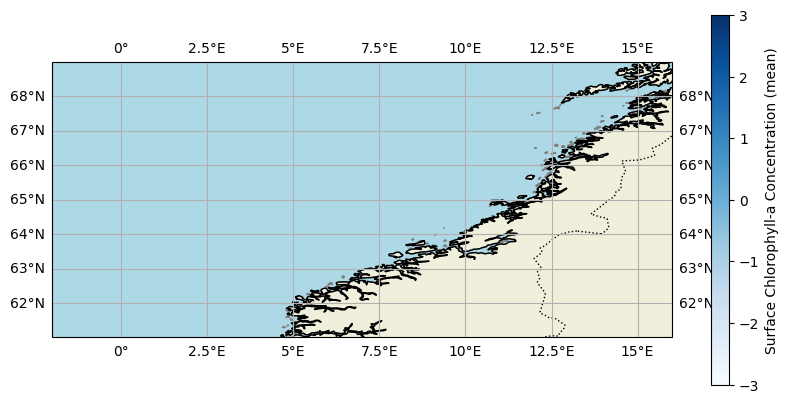

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract the chlor_a_features DataArray and select the 'mean' value
chlor_a_features = chlor_a_features_reprojected['chlor_a_features']

# Select the 'mean' statistic
chlor_a_mean_data = chlor_a_features.sel(stat='mean')

# Convert the DataArray to a NumPy array
data = chlor_a_mean_data.values

# Get the coordinates for the plot (assuming they are related to longitude and latitude)
x = chlor_a_mean_data.coords['xc'].values  # x-coordinates (longitude)
y = chlor_a_mean_data.coords['yc'].values  # y-coordinates (latitude)

# Create meshgrid for plotting
x_grid, y_grid = np.meshgrid(x, y)

# Create figure and axes with Cartopy projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent for mid-Norway (approx 61N-69N, -2E-16E)
ax.set_extent([-2, 16, 61, 69], crs=ccrs.PlateCarree())  # Focus on mid-Norway

# Add map features for Norway (coastlines, borders, land)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='white')  # Norway will stay white
ax.add_feature(cfeature.LAND, edgecolor='gray')

# Mask NaN values in the chlorophyll data (NaNs will be replaced with white)
masked_data = np.ma.masked_invalid(data)

# Plot chlorophyll data using pcolormesh (masked NaNs won't be plotted)
# First, plot the chlorophyll data so it's on top of the base map
c = ax.pcolormesh(x_grid, y_grid, masked_data, cmap="Blues", vmin=-3, vmax=3, transform=ccrs.PlateCarree())

# Add a colorbar to the plot
fig.colorbar(c, ax=ax, shrink=0.6, label="Surface Chlorophyll-a Concentration (mean)")

# Add gridlines with labels for lon/lat
ax.gridlines(draw_labels=True)

# Set the background color for the area outside Norway to light blue
ax.set_facecolor('lightblue')  # Background color for outside Norway will be light blue

# Show the plot
plt.show()
